In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [706]:
import pandas as pd 
tsv_file='datasets/fips2county.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')[['CountyName','StateName','CountyFIPS','StateAbbr']]
csv_table.rename(columns={'CountyName': 'County', 'StateName': 'State','CountyFIPS':'FIPS'}, inplace=True)
csv_table[['County','State','StateAbbr']] = csv_table[['County','State','StateAbbr']].astype('string')
csv_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   County     3143 non-null   string
 1   State      3143 non-null   string
 2   FIPS       3143 non-null   int64 
 3   StateAbbr  3143 non-null   string
dtypes: int64(1), string(3)
memory usage: 98.3 KB


In [786]:
import pandas as pd
df1 = pd.read_excel('datasets/2019 County Health Rankings Data - v3.xls', 
                    sheet_name='Additional Measure Data', 
                    header=1,
                    usecols='A,B,C,CL,D,K,R,Y,BN,CE,CI,DG')
df1['State'] = df1['State'].astype('string').str.strip()
df1['County'] = df1['County'].astype('string').str.strip()
df1 = df1.iloc[:,[0,1,2,7,9,10]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS                          3142 non-null   int64  
 1   State                         3142 non-null   string 
 2   County                        3142 non-null   string 
 3   Household Income              3141 non-null   float64
 4   % Severe Housing Cost Burden  3141 non-null   float64
 5   Population                    3142 non-null   int64  
dtypes: float64(2), int64(2), string(2)
memory usage: 147.4 KB


In [793]:
df2 = pd.read_excel('datasets/2019 County Health Rankings Data - v3.xls', 
                    sheet_name='Ranked Measure Data', 
                    header=1,
                    usecols='A,B,C,K,AM,CV,CZ,DF,DZ,EC,EJ,EN,EU,FC')
df2['State'] = df2['State'].astype('string').str.strip()
df2['County'] = df2['County'].astype('string').str.strip()
df2['FIPS'] = df2['FIPS'].astype('int')
df2 = df2.iloc[:,[0,1,2,3,7,8,9,10,11,12,13]]
df2 = df2.dropna(subset=["Violent Crime Rate"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIPS                           2951 non-null   int64  
 1   State                          2951 non-null   string 
 2   County                         2951 non-null   string 
 3   % Fair/Poor                    2951 non-null   float64
 4   % Unemployed                   2951 non-null   float64
 5   Association Rate               2951 non-null   float64
 6   Violent Crime Rate             2951 non-null   float64
 7   Average Daily PM2.5            2935 non-null   float64
 8   % Severe Housing Problems      2951 non-null   float64
 9   % Drive Alone                  2951 non-null   float64
 10  % Long Commute - Drives Alone  2951 non-null   float64
dtypes: float64(8), int64(1), string(2)
memory usage: 276.7 KB


In [794]:
df3 = pd.read_csv('datasets/annual_aqi_by_county_2019.csv', usecols=[0,1,2,3,10,11,12] )
df3['State'] = df3['State'].astype('string') 
df3['County'] = df3['County'].astype('string') 
dff = pd.merge(df3.iloc[:,:2],df2.iloc[:,:3], on=["State","County"], how="inner")
df3['FIPS'] = dff['FIPS']
df3 = df3.dropna(subset=['FIPS'])
df3['FIPS'] = df3['FIPS'].astype('int')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                964 non-null    string
 1   County               964 non-null    string
 2   Year                 964 non-null    int64 
 3   Days with AQI        964 non-null    int64 
 4   Max AQI              964 non-null    int64 
 5   90th Percentile AQI  964 non-null    int64 
 6   Median AQI           964 non-null    int64 
 7   FIPS                 964 non-null    int64 
dtypes: int64(6), string(2)
memory usage: 67.8 KB


In [795]:
df4 = pd.read_excel('datasets/Table_10_Offenses_Known_to_Law_Enforcement_by_State_by_Metropolitan_and_Nonmetropolitan_Counties_2019.xls', 
                    header=4,sheet_name='19tbl10',usecols="A,B,C,H")
df4 = df4.iloc[1:2204]
df4 = df4.rename(columns={"Violent\ncrime": "Violent crimes", "Property\ncrime": "Property crimes"})
df4['State'].fillna(method='ffill', inplace=True)
df4['State'] = df4['State'].str.capitalize().astype('string').str.strip()
df4['County'] = df4['County'].astype('string').str.strip()
df4[['State','County Type']] = df4['State'].str.split(' -',expand=True)
df4 = pd.merge(df2[['FIPS','State','County']],df4, on=["State","County"], how='inner')
df4 = df4.iloc[:,:-1]
df4


,FIPS,State,County,Violent crimes,Property crimes
0,4003,Arizona,Cochise,47.0,531.0
1,4005,Arizona,Coconino,127.0,264.0
2,4007,Arizona,Gila,176.0,384.0
3,4009,Arizona,Graham,61.0,104.0
4,4012,Arizona,La Paz,40.0,310.0
...,...,...,...,...,...
1685,56035,Wyoming,Sublette,3.0,45.0
1686,56037,Wyoming,Sweetwater,16.0,83.0
1687,56041,Wyoming,Uinta,2.0,40.0
1688,56043,Wyoming,Washakie,2.0,22.0


In [796]:
df5 = pd.read_excel('datasets/natamenf_1_.xls',header=[102,103,104])
df5.columns = [' '.join(col).strip() for col in df5.columns.values]
# df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
df5 = pd.concat([df5.iloc[:,1:4],df5.iloc[:,20:22]],axis=1)
df5 = df5.rename(columns={"County Ind. FIPS used for measures": "FIPS", 
                          "County Ind. FIPS used STATE": "State",
                          "County Ind. FIPS used County name": "County",
                          df5.columns[3]:"Natural amenity Scale"})
df5['County'] = df5['County'].str.capitalize()
df5['State'] = df5['State'].astype('string').str.strip()
df5['County'] = df5['County'].astype('string').str.strip()
df5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FIPS                                 3111 non-null   int64  
 1   State                                3111 non-null   string 
 2   County                               3111 non-null   string 
 3   Natural amenity Scale                3111 non-null   float64
 4   Natural amenity rank  1=Low  7=High  3111 non-null   int64  
dtypes: float64(1), int64(2), string(2)
memory usage: 121.6 KB


In [797]:
df6 = pd.read_csv('datasets/County_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv', usecols=[0,1,2,3,4,5,6,7,8,237,238,239,240,241,242,243,244,245,246,247,248,248])
df6 = df6.round(2)
mean_zhvi = df6.iloc[:,9:].mean(axis=1,skipna=True).round(2)
df6['zhvi_mean'] = mean_zhvi
df6[['A','B']] = df6['RegionName'].str.split(' County', expand=True)
df6['RegionName'] = df6['A']
df6 = df6.iloc[:,:22]
df6 = df6.dropna(subset=['zhvi_mean'])
df6.drop(columns=['RegionID','SizeRank','RegionType','StateName','Metro','StateCodeFIPS','MunicipalCodeFIPS'],inplace=True)
df6.rename(columns={'RegionName':'County'},inplace=True)
df6[['County','State']] = df6[['County','State']].astype('string')
df6 = pd.merge(df6,csv_table,left_on=['State','County'],right_on=['StateAbbr','County'], how='inner')
df6.drop(['State_y'],axis=1,inplace=True)
df6.rename(columns={'State_x':'State'},inplace=True)
df6['FIPS'] = df6['FIPS'].astype('int')
df6 = df6.iloc[:,[0,1,14,15,16]]
df6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2955
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   County     2956 non-null   string 
 1   State      2956 non-null   string 
 2   zhvi_mean  2956 non-null   float64
 3   FIPS       2956 non-null   int64  
 4   StateAbbr  2956 non-null   string 
dtypes: float64(1), int64(1), string(3)
memory usage: 138.6 KB


In [807]:
# Merge dataframes on the 'FIPS' column
df_merged=csv_table
df_merged = pd.merge(df1, df2, on='FIPS', how='inner',suffixes=('','_x'))
# df_merged = pd.merge(df_merged, df3, on='FIPS', how='inner',suffixes=('','_x'))
# df_merged = pd.merge(df_merged, df4, on='FIPS', how='inner',suffixes=('','_x'))
df_merged = pd.merge(df_merged, df5, on='FIPS', how='inner',suffixes=('','_x'))
df_merged = pd.merge(df_merged, df6, on='FIPS', how='inner',suffixes=('','_x'))

df_merged.drop(df_merged.filter(regex='_x$').columns, axis=1, inplace=True)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2824
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FIPS                                 2825 non-null   int64  
 1   State                                2825 non-null   string 
 2   County                               2825 non-null   string 
 3   Household Income                     2825 non-null   float64
 4   % Severe Housing Cost Burden         2825 non-null   float64
 5   Population                           2825 non-null   int64  
 6   % Fair/Poor                          2825 non-null   float64
 7   % Unemployed                         2825 non-null   float64
 8   Association Rate                     2825 non-null   float64
 9   Violent Crime Rate                   2825 non-null   float64
 10  Average Daily PM2.5                  2825 non-null   float64
 11  % Severe Housing Problems     

In [813]:
dataframe = df_merged.iloc[:,3:17]
dataframe.columns[:-1]

Index(['Household Income', '% Severe Housing Cost Burden', 'Population',
       '% Fair/Poor', '% Unemployed', 'Association Rate', 'Violent Crime Rate',
       'Average Daily PM2.5', '% Severe Housing Problems', '% Drive Alone',
       '% Long Commute - Drives Alone', 'Natural amenity Scale',
       'Natural amenity rank  1=Low  7=High'],
      dtype='object')

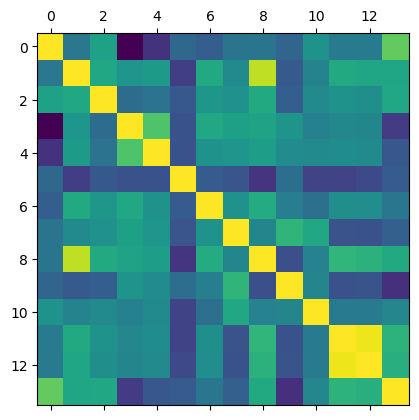

In [809]:
import matplotlib.pyplot as plt

plt.matshow(dataframe.corr())
plt.show()

/var/folders/30/446_f0l11w35mlswd2br0w740000gp/T/ipykernel_41921/2066985601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr.index, rotation=45)


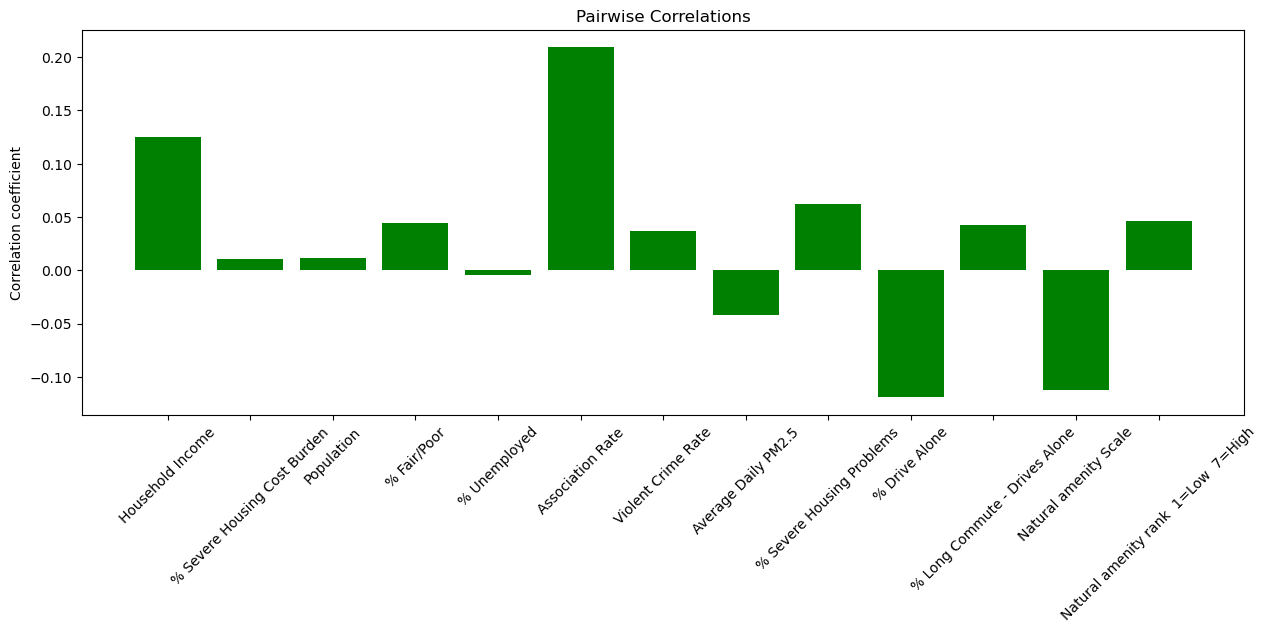

In [823]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a sample dataframe with 10 features and 1 target variable
np.random.seed(123)
df = pd.DataFrame(np.random.randn(100, 14), columns=dataframe.columns)

# calculate pairwise correlations
corr = df.corr()['zhvi_mean'][:-1] #exclude target column as it is not required for correlations

# plot a bar graph of correlations
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()
ax.bar(corr.index, corr.values, color='green')
ax.set_xticklabels(corr.index, rotation=45)
ax.set_ylabel('Correlation coefficient')
ax.set_title('Pairwise Correlations')
plt.show()

In [810]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Split the data into training and test sets
train = dataframe.sample(frac=0.8, random_state=42)
test = dataframe.drop(train.index)
# print(test)
# Define the predictor and target variables
X_train = train.drop('zhvi_mean', axis=1)
y_train = train['zhvi_mean']
X_test = test.drop('zhvi_mean', axis=1)
y_test = test['zhvi_mean']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using MSE, RMSE, R2 score, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
adj_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")


MSE: 13001453682.38
RMSE: 114023.92
R2 score: 0.72
MAE: 57248.58
Adjusted R2 score: 0.71
